## Let's check to see what stories from part 1 are in dataset2

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas
%matplotlib inline
import numpy as np
from IPython.display import display, HTML


In [2]:
pandas.set_option('max_colwidth', 1000)

## Load Part 1 Data

In [3]:
part1_df = pandas.read_csv('DATA/STUDY1/Part1/flattened_ALL.csv')

In [4]:
part2_df = pandas.read_csv('DATA/STUDY1/Part2/flattened_results.csv')
part2_df.columns

Index([u'worker_id', u'gender', u'age', u'party', u'voting_for', u'state',
       u'title', u'source', u'candidate', u'flesch', u'is_complex', u'fair',
       u'trust'],
      dtype='object')

In [5]:
urls1 = set(part1_df.url)
titles1 = set(part1_df.title)
titles2 = set(part2_df.title)

## In the entire dataset, how many stories from part 1 are in here?

In [6]:
tweets_df = pandas.read_csv('DATA/USERS/all_data.csv', dtype={'candidates': 'S10'})

In [7]:
len(tweets_df)

137978

In [8]:
tweeted_titles = set(tweets_df.title)

In [9]:
intersect1 = tweeted_titles.intersection(titles1)

In [10]:
intersect2 = tweeted_titles.intersection(titles2)

In [11]:
print "Number of Stories from Study 1 Tweeted About:", len(intersect1)
print "Percent of Stories from Study 1 Tweeted About:", len(intersect1) / (.01 *  len(titles1)), '%'
print "Total Number of Stories from Study 1:", len(titles1)

Number of Stories from Study 1 Tweeted About: 54
Percent of Stories from Study 1 Tweeted About: 45.0 %
Total Number of Stories from Study 1: 120


In [12]:
print "Number of Stories from Study 2 Tweeted About:", len(intersect2)
print "Percent of Stories from Study 2 Tweeted About:", len(intersect2) / (.01 *  len(titles2)), '%'
print "Total Number of Stories from Study 2:", len(titles2)

Number of Stories from Study 2 Tweeted About: 0
Percent of Stories from Study 2 Tweeted About: 0.0 %
Total Number of Stories from Study 2: 8


In [13]:
# How many tweets do we have for each of the stories that are replicated in Part1?

In [14]:
len(intersect1)

54

In [15]:
intersect_url = set(tweets_df.url).intersection(urls1)

In [16]:
len(intersect_url)

52

In [17]:
print "Number of Stories from Study 1 Tweeted About:", len(intersect_url)
print "Percent of Stories from Study 1 Tweeted About:", len(intersect_url) / (.01 *  len(urls1)), '%'
print "Total Number of Stories from Study 1:", len(urls1)

Number of Stories from Study 1 Tweeted About: 52
Percent of Stories from Study 1 Tweeted About: 44.4444444444 %
Total Number of Stories from Study 1: 117


In [18]:
intersect_df = tweets_df[tweets_df.url.isin(urls1)]

In [19]:
print len(intersect_df)

1559


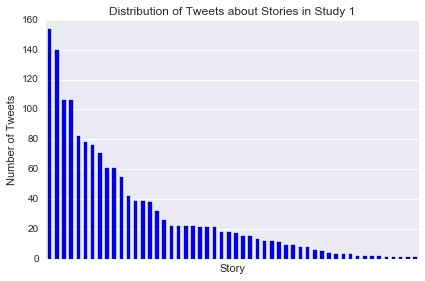

In [20]:
intersect_df.url.value_counts().plot(kind='bar')
plt.xticks([])
plt.ylabel('Number of Tweets')
plt.xlabel('Story')
plt.title("Distribution of Tweets about Stories in Study 1")
plt.tight_layout()
plt.savefig('FIGS/OVERLAP/tweet_dist.png')

In [21]:
gt_10_tweets = intersect_df.title.value_counts()[intersect_df.title.value_counts() >= 10]

In [22]:
len(gt_10_tweets)

33

In [74]:
sum(gt_10_tweets)

1488

In [24]:
part1_df[part1_df.title=='Why Cruz is in trouble in Texas'].trust.mean()

0.0

In [25]:
trusts = []

In [26]:
for t in gt_10_tweets.index:
    print t,',', gt_10_tweets[t],',',"%.2f" % part1_df[part1_df.title==t].trust.mean()
    trusts.append(part1_df[part1_df.title==t].trust.mean())

Jeb Bush on Donald Trump: 'The guy needs therapy' , 154 , 0.50
Why Cruz is in trouble in Texas , 140 , 0.00
Sanders a prolific Dem fundraiser , 106 , 0.83
Ted Cruz's conventional campaign to win Iowa , 106 , 0.33
Who's funding this pro-Ted Cruz super PAC? , 82 , 0.17
CNN/WMUR Poll: Cruz climbs in NH , 78 , 0.67
Sanders surpasses 2015 fundraising goal with sizable haul , 76 , 0.33
Cruz rules out 'deportation force' to boot undocumented immigrants , 71 , 1.00
Ted Cruz worry: Big South Carolina loss equals bad Super Tuesday , 61 , 0.50
Hillary Clinton hopes for strong Latino turnout in Nevada , 61 , 1.17
Evangelical leader sub-tweets Donald Trump , 55 , 0.67
Political fallout for Clinton after North Korea's nuke test , 42 , 0.17
Ted Cruz tries to seize Rand Paul's libertarian mantle , 39 , 0.83
Takeaways from Ted Cruz's Iowa road trip , 39 , 0.67
Obama hopes to pave way for Clinton with SOTU , 38 , 0.50
Cruz to tea party supporters: Don't get 'burned' by fake conservatives , 32 , 0.50
Cli

In [27]:
print "avg:", sum(trusts)/len(trusts)

avg: 0.606060606061


In [28]:
intersect_df.columns

Index([u'_id', u'author', u'sentiment', u'time', u'tweet', u'url', u'a_id',
       u'title', u'date_written', u'org', u't_id', u'candidates'],
      dtype='object')

In [32]:
# let's make a df: url | avg trust
trust_df = pandas.DataFrame(part1_df.groupby('url').trust.mean())

In [47]:
# now let's make a df: url | num tweets
tweet_counts = pandas.DataFrame(tweets_df.groupby('url').size(), columns=['num_tweets'])

In [55]:
trust_viral_df = pandas.merge(trust_df, tweet_counts, left_index=True, right_index=True)

In [56]:
trust_viral_df.to_csv('DATA/TRUST_VIRALITY/trust_viral_df.csv')

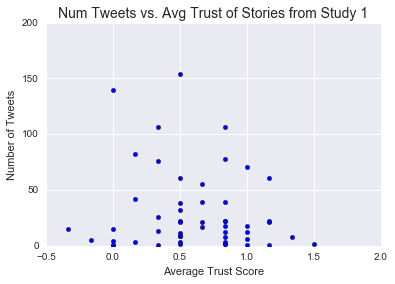

In [71]:
plt.scatter(trust_viral_df.trust, trust_viral_df.num_tweets)
plt.title('Num Tweets vs. Avg Trust of Stories from Study 1', fontsize=14)
plt.ylim([0,200])
plt.xlabel('Average Trust Score')
plt.ylabel('Number of Tweets')
plt.savefig('FIGS/TRUST_VIRALITY/tweets_vs_trust.png')

In [72]:
from scipy.stats import pearsonr

In [73]:
pearsonr(trust_viral_df.trust, trust_viral_df.num_tweets)

(-0.10981076831641384, 0.43836605291271258)